[Here are the slides](https://docs.google.com/presentation/d/11uyJMpCyVceYlC50QUdVp3DJe42BLxW4CHykxIdR7AU/edit?usp=sharing)


# Opening Images in Python

How to use the Pillow library

In [1]:
from PIL import Image

In [2]:
img = Image.open('alice.png')

In [3]:
from matplotlib import pyplot as plt

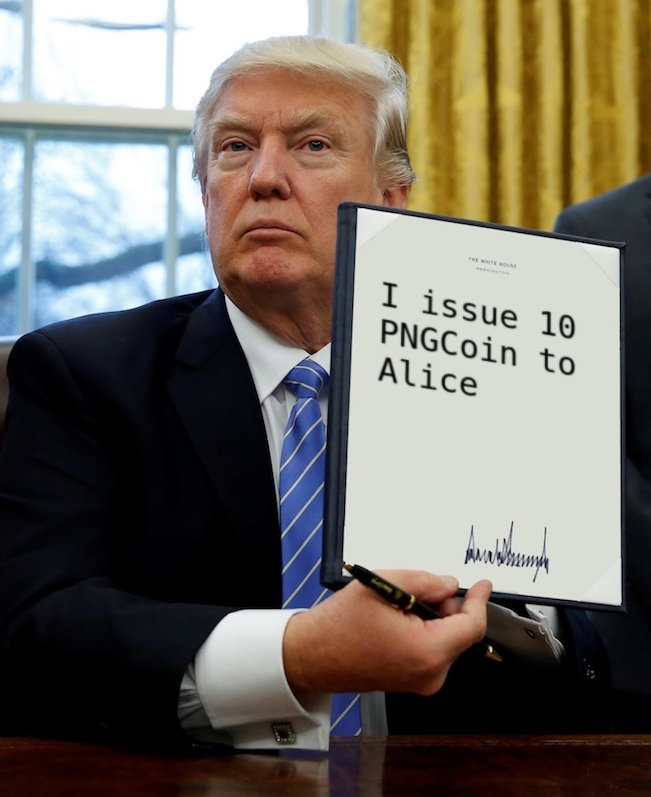

In [4]:
from IPython.display import display
display(img)

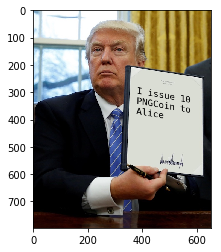

In [5]:
plt.imshow(img)

# Asking User to Verify a PNG Signature 

Requesting user input. Does the supplied signature photo make sense?

In [6]:
def validate():
    user_input = input("Is this a valid signature? (y/n)")
    if user_input.lower() == 'y':
        print("It's valid.")
    elif user_input.lower() == 'n':
        print("It's not valid!")
    else:
        print("Please pick Y or N")
        validate()

def display_and_validate(filename):
    img = Image.open(filename)
    display(img)
    validate()

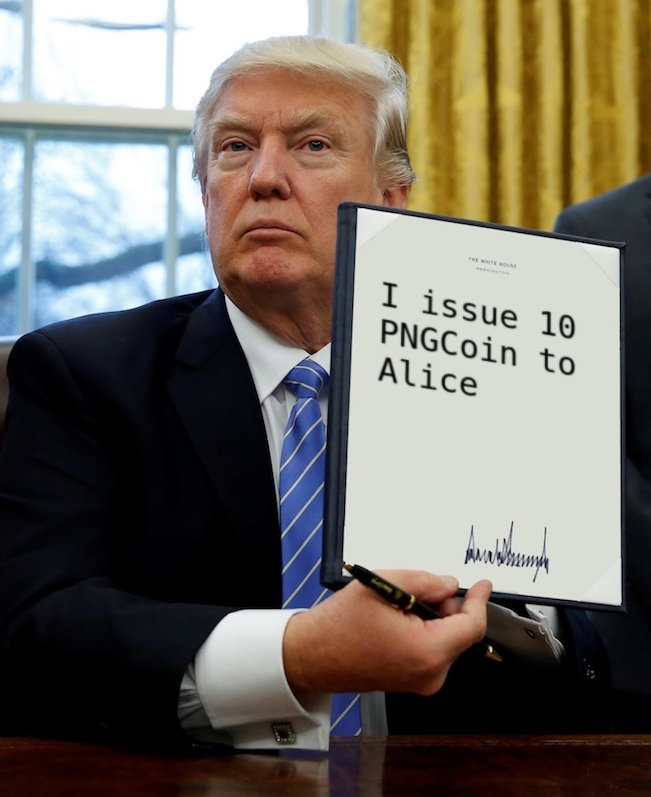

Is this a valid signature? (y/n)
Please pick Y or N
Is this a valid signature? (y/n)
Please pick Y or N
Is this a valid signature? (y/n)y
It's valid.


In [7]:
display_and_validate("alice.png")

# Defining the Coin

Stupid-simple Python class

In [18]:
class PNGCoin:
    def __init__(self, transfer):
        self.transfers = transfer
            
def validate(coin):
    for transfer in coin.transfers:
        transfer.show()
        is_valid = handle_user_input()
        if not is_valid:
            print(False)
        print(True)


def handle_user_input():
    user_input = input("Is this a valid signature? (y/n)")

    if user_input.lower() == 'y':
        return True
    elif user_input.lower() == 'n':
        return False
    else:
        handle_user_input()

# Validating a Coin

Here we check every entry in PNGCoin.transfers

In [19]:
coin = PNGCoin([
    Image.open("alice.png"),
    Image.open("alice-to-bob.png"),
])

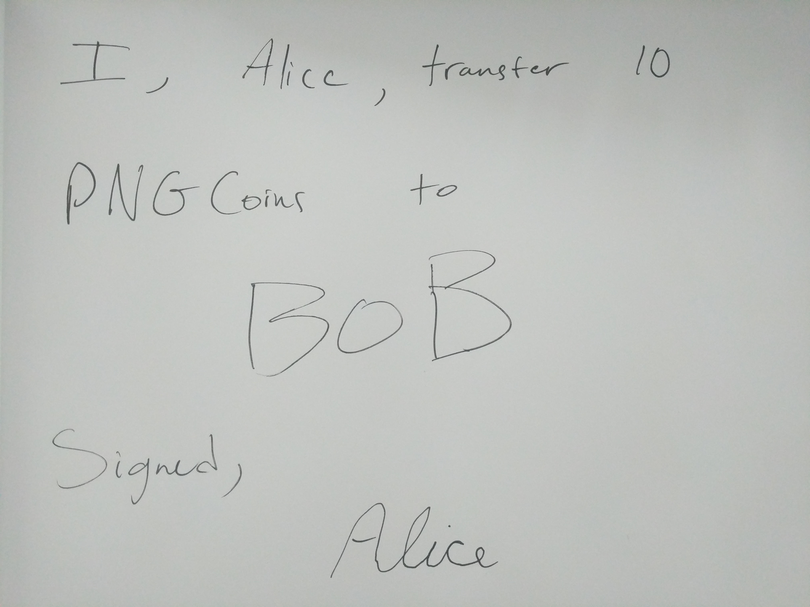

In [20]:
display(coin.transfers[1])

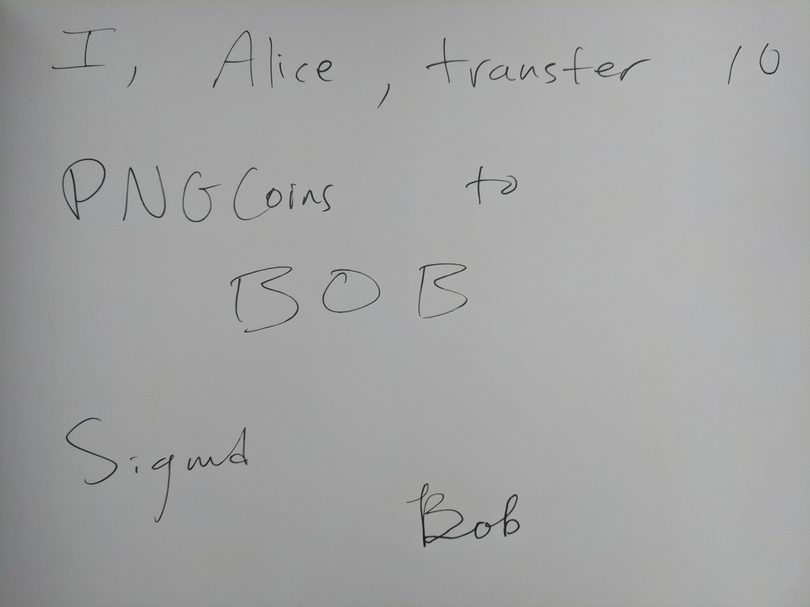

In [21]:
Image.open("alice-to-bob-forged.png")

In [22]:
validate(coin)

Is this a valid signature? (y/n)y
True
Is this a valid signature? (y/n)y
True


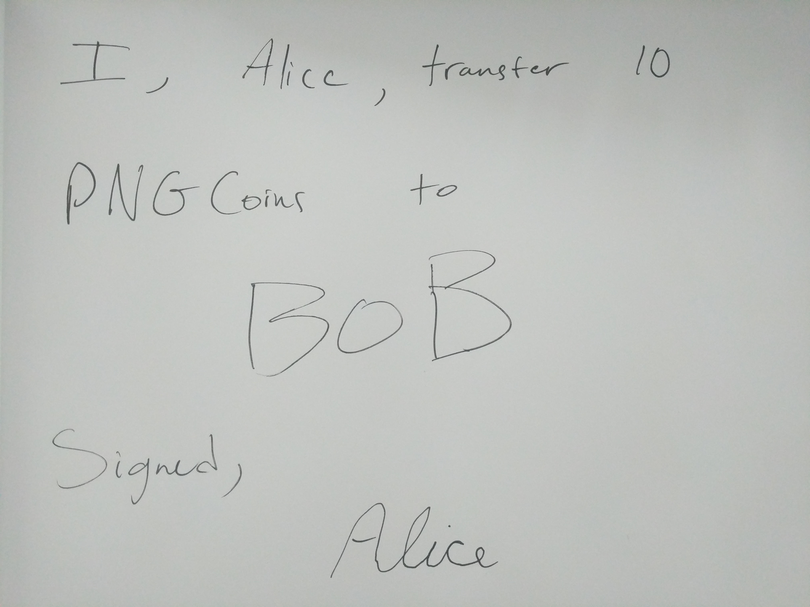

In [16]:
coin.transfers[1]

# Serializing Coins 

Let's take the coin defined ^^ and write it to disk

In [23]:
import pickle

In [24]:
def serialize(coin):
    return pickle.dumps(coin)

In [25]:
def to_disk(coin, filename):
    serialized = serialize(coin)
    with open(filename, "wb") as f:
        f.write(serialized)        

In [27]:
!ls | grep "bobs.pngcoin"

In [29]:
to_disk(coin, "bobs.pngcoin")

In [30]:
!ls | grep "bobs.pngcoin"

bobs.pngcoin


# Deserializing Coins

Let's take the `coin.pngcoin` file we created ^^ and read it back into Python

In [31]:
def deserialize(serialized):
    return pickle.loads(serialized)

In [32]:
coin_check = deserialize(serialize(coin))

In [35]:
coin_check.transfers

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=651x797 at 0x117AD2400>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=810x607 at 0x117AD24A8>]

In [34]:
coin_check.transfers == coin.transfers

True

In [36]:
def from_disk(filename):
    with open(filename, "rb") as f:
        serialized = f.read()
    return deserialize(serialized)

In [38]:
coin_load = from_disk("bobs.pngcoin")

In [40]:
coin_load.transfers == coin.transfers

True

# Using the Final Library

I also wrote a [pngcoin.py](pngcoin.py) library that uses a more object-oriented design. Let's explore how it works: